# Neural Network Stock Price Forecasting

This documentation is an extension of the study in the field of machine learning, focusing on the exploration and implementation of neural networks for predicting stock prices.

> Building upon our [previous exploration](https://github.com/dmytro-varich/Linear-Regression-for-Stock-Price-Prediction) of linear regression for predicting monthly stock prices, this documentation delves into the more intricate task of forecasting daily stock prices. The increased complexity arises from the inherent volatility and rapid fluctuations in daily markets, presenting a more challenging prediction scenario compared to the comparatively stable monthly trends.

## Introduction 📃

Explore the development of a stock price prediction model using [Python](https://www.python.org/) in this documentation. Delve into the breakdown of essential sections within this document, mirroring my work in [Jupyter Notebook](https://jupyter.org/). This document encompasses key sections that reflect my diligent work in **Neural Network 🧠**, **Data Processing 📊**, **Network Design 🎨**, **Network Training 🚀**, and **Network Evaluation 📉**, each with its respective subsections detailing specific aspects of the process.

> Within the scope of my task, the workflow involves processing the dataset, partitioning the data into training and testing sets, and subsequently exploring five distinct network topologies. The objective is to assess and determine the most performant and effective topology among them.

### Table of contents

1. [Introduction](##Introduction)

2. [Neural Network](##NeuralNetwork)

3. [Data Processing](#DataProcessing)

4. [Network Design](#NetworkDesign)

5. [Network Evaluation](#NetworkEvaluation)

6. [Conclusion](#Conclusion)

7. [Author](#Author)

## Neural Network 🧠

**Neural networks (NN)** are a fundamental concept in machine learning, inspired by the way the human brain processes information. It consists of interconnected nodes, known as neurons, organized in layers. These networks are widely used for various tasks such as classification, regression, and pattern recognition. Key components include:

- **Neurons:** Basic processing units, organized in layers. They receive inputs, apply weights, and produce an output. The activation function determines the neuron's output based on its inputs and weights.

- **Layers:** Neurons are organized into layers, including the input layer, hidden layers, and the output layer. The arrangement of layers influences the network's capacity to learn complex patterns.

- **Weights and Biases:** Parameters adjusted during training, determining the strength of connections between neurons. This adjustment enables the network to make accurate predictions.

### Neural Network Architecture

Neural network architecture defines the structural design governing how artificial neurons are organized and connected, crucial for the network's learning capabilities. Various architectures cater to specific tasks:

- **Feedforward Neural Network (FNN):** A basic and widely used topology where information flows unidirectionally, from the input layer through hidden layers to the output layer. It's suitable for tasks like image classification and regression.

- **Recurrent Neural Network (RNN):** Distinguished by cyclic connections, RNNs can retain information over time, making them well-suited for sequential data analysis. Applications include natural language processing and time series prediction.

- **Convolutional Neural Network (CNN):** Specifically designed for grid-like data such as images, CNNs utilize convolutional layers to extract spatial hierarchies of features. They excel in image and video analysis.

- **Long Short-Term Memory (LSTM) Network:** A type of recurrent neural network, LSTMs address the vanishing gradient problem and are effective in capturing long-term dependencies in sequential data. Commonly used in speech recognition and language modeling.

- **Gated Recurrent Unit (GRU) Network:** Similar to LSTMs, GRUs are another variant of recurrent neural networks. They simplify the architecture, making them computationally more efficient while still handling sequential data effectively.

### Implementing Neural Network

1. **Data Preprocessing:**
   Ensure data is appropriately formatted, handle missing values, and normalize or scale features as needed. This step lays the foundation for effective model training.

2. **Network Design:**
   Define the architecture of the neural network, including the number of layers, type of neurons, and activation functions. Choose an appropriate loss function and optimizer based on the nature of the task.

3. **Network Training:**
   Utilize the preprocessed data to train the neural network. Adjust the model's parameters (weights and biases) iteratively to minimize the defined loss function. Monitor performance on a validation set to prevent overfitting.

4. **Network Evaluation:**
   Assess the trained model's performance on a separate test dataset to gauge its generalization capabilities. Evaluate metrics such as accuracy, precision, recall, and F1-score to quantify the model's effectiveness in addressing the specific task.

### Python Frameworks

Python, with its robust community support, hosts several frameworks for neural network implementation. For example:

- **TensorFlow:** Developed by Google, TensorFlow is a comprehensive platform for building and deploying machine learning models, offering flexibility and scalability.

- **PyTorch:** Backed by Facebook, PyTorch is known for its dynamic computation graph, making it intuitive for researchers and developers to experiment with different architectures.

- **Keras:** Built on top of TensorFlow and designed for ease of use, Keras is a high-level neural networks API, enabling quick prototyping and experimentation.

- **Scikit-learn:** While not exclusively for neural networks, scikit-learn provides tools for data mining and data analysis, including simple neural network implementations.

- **Theano:** An open-source numerical computation library, Theano, allows for efficient definition and optimization of mathematical expressions.

# Data Processing 📊

Within the confines of this section, the tasks involve loading the dataset, selecting features for input and output, normalizing values, and dividing the dataset into training, testing, and validation sets. The dataset utilized in the previous research will be incorporated into this study, primarily to maintain continuity and coherence. This decision is grounded in the necessity for consistency and comparability with past findings.

> The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021), contains historical price data for Apple Inc. (AAPL) spanning from 1980 to 2020. It provides daily insights, measuring various aspects, all denominated in US dollars. Comprising over 10000 rows and 7 columns: Date, Open, High, Low, Close, Adjusted Close, and Volume – the dataset offers comprehensive information for the research objectives.

### Loading Dataset

To begin, we will employ the [Pandas](https://pandas.pydata.org/) library to load the dataset and introduce a new column, **"Predict"** which will house the future day's stock price. This predictive column serves as the target variable for our analysis, facilitating the modeling of price movements.



In [20]:
import pandas as pd

# Load the Apple stocks dataset
path = "C:\\Users\\admin\\Desktop\\MachineLearning\\AAPL.csv"
dataset = pd.read_csv(path)

# Adding the 'Predict' column with predicted closing prices for the next days 
projection = 1
dataset['Predict'] = dataset["Adj Close"].shift(-projection) 

# Remove rows with missing values
dataset = dataset.dropna()  

In [7]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Predict
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,0.095089
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,0.088110
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,0.090291
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,0.092908
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,0.098578
...,...,...,...,...,...,...,...,...
10403,2022-03-17,158.610001,161.000000,157.630005,160.619995,160.619995,75615400,163.979996
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200,165.380005
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,168.820007
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,170.210007


### Visualizing Data

In this section, we leverage data visualization techniques to gain valuable insights from the dataset. Employing Python libraries such as [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/), we focus on numerical analysis, excluding the **"Date"** column to create a pair plot of numerical features.

The generated pair plot, facilitated by the `Seaborn` library, serves as a visual matrix of scatterplots, revealing potential correlations and patterns among variables. This visual exploration is a crucial step in understanding the inherent relationships within the dataset. 

Positive trends in scatterplots indicate a positive correlation between variables, while negative trends suggest a negative correlation. Additionally, the distribution of data points provides insights into the spread and concentration of values for each variable.

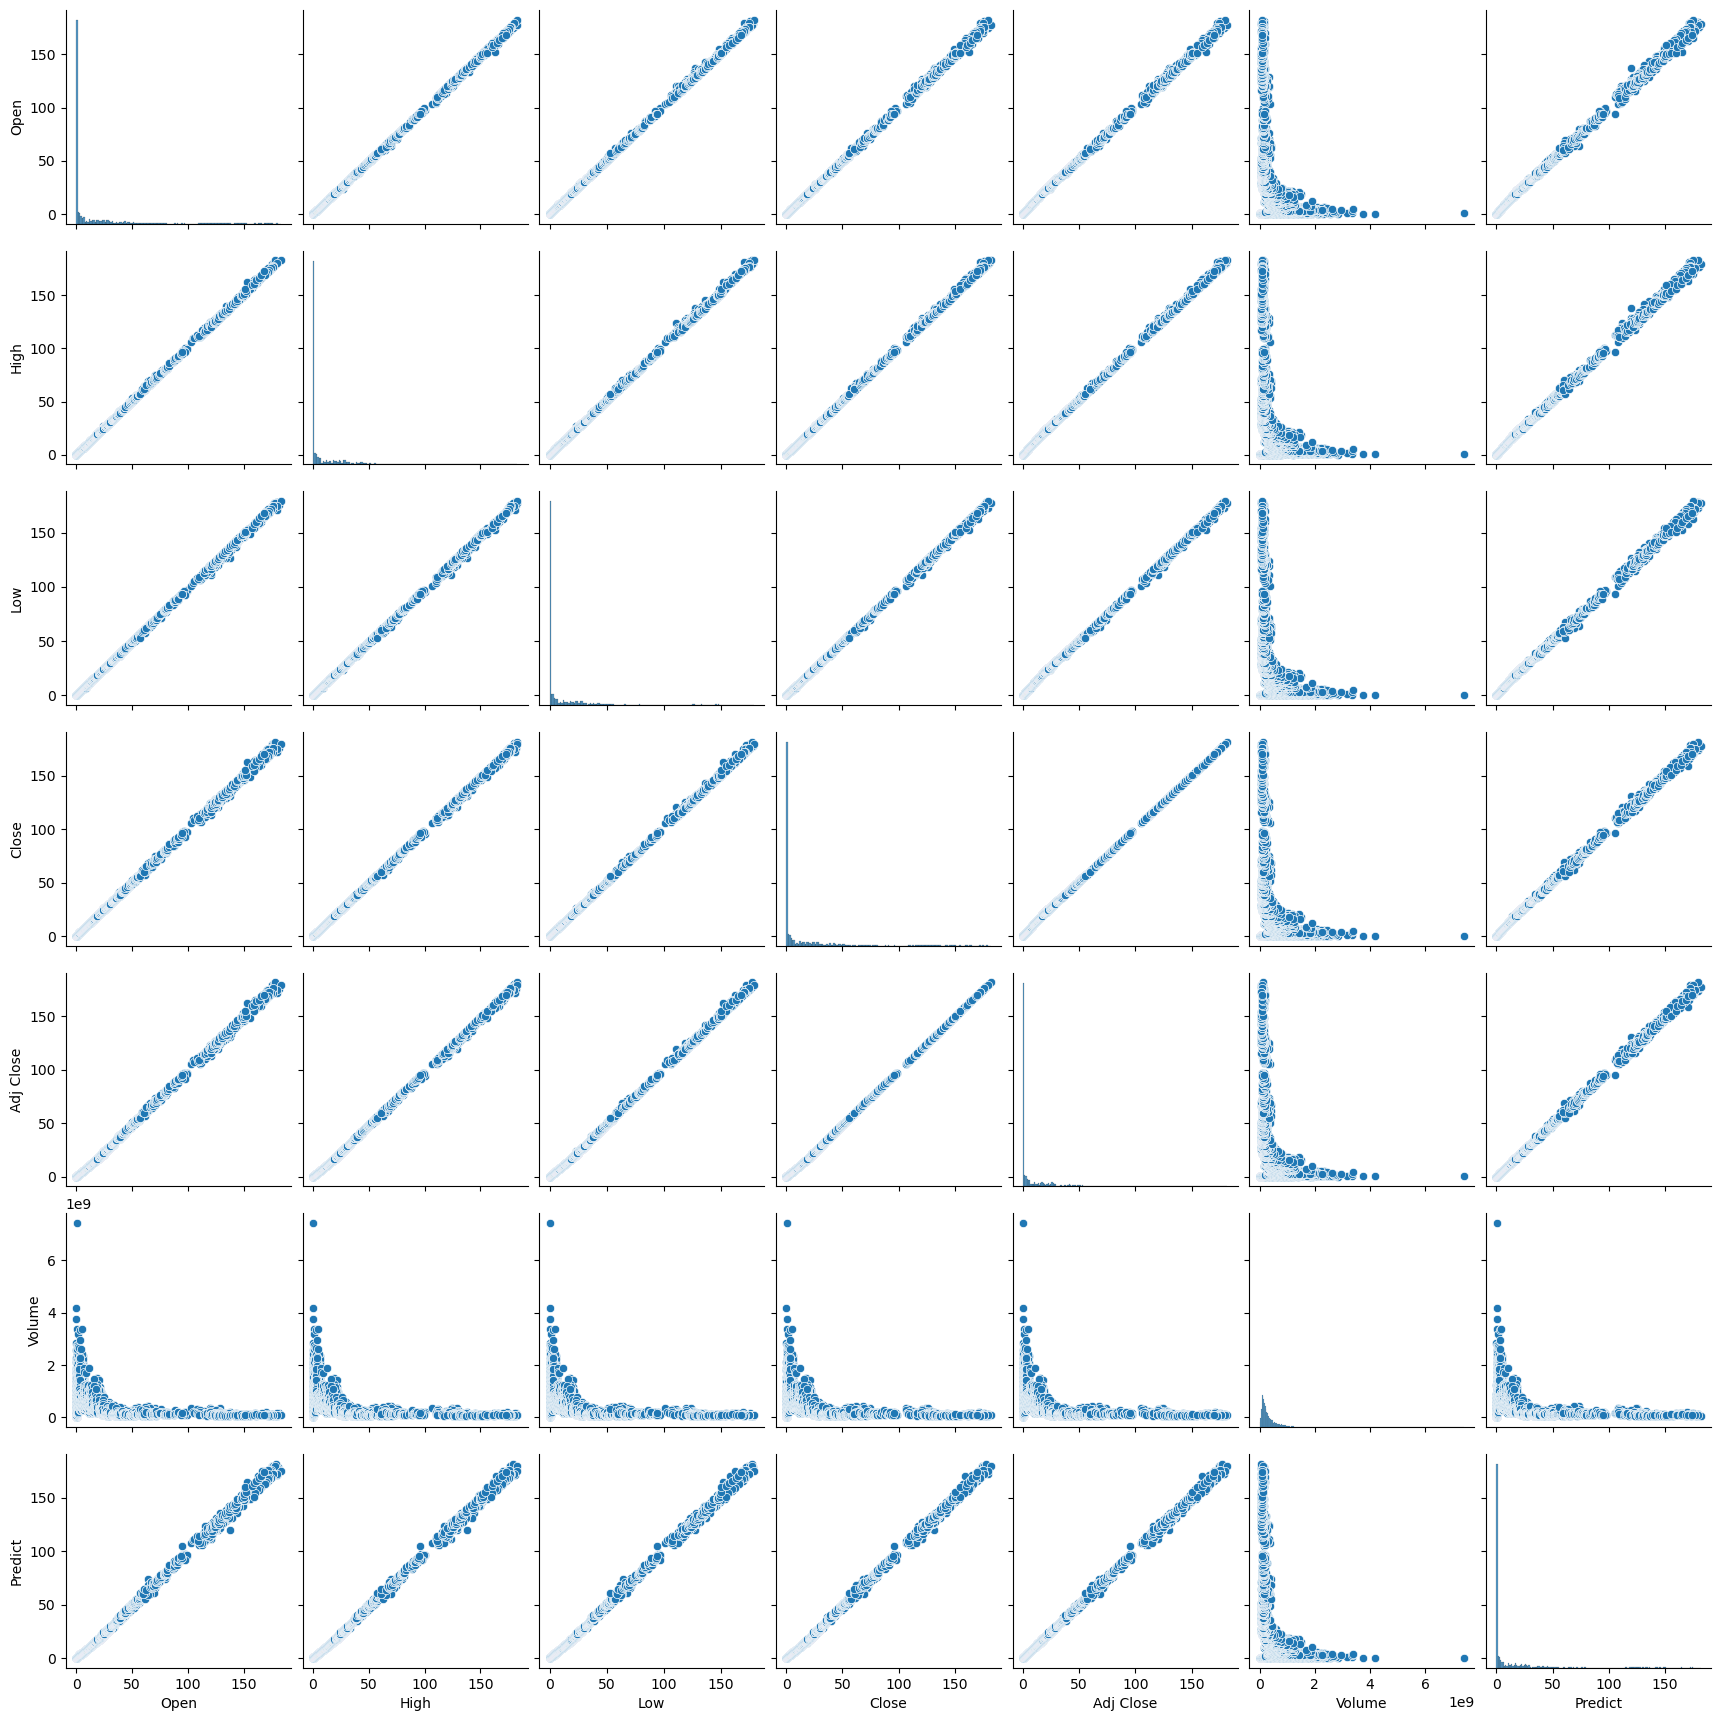

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'Date' column for numerical analysis
dataset_numeric = dataset.drop(['Date'], axis=1)

# Create a pair plot for numerical features
sns.pairplot(dataset_numeric)

# Display plots using matplotlib
plt.show()

### Correlation Analysis

To determine the interrelationships among key features in the dataset, we conduct correlation analysis. Using Python libraries, including `Pandas`, a correlation matrix is constructed, with a focus on the columns "Open", "High", "Low", "Adj Close", "Volume" and the predicted "Predict" (Next Day's Price). 

Understanding the correlations between features is pivotal for developing machine learning models, guiding decisions on feature selection and optimization. The correlation matrix, visualized as a heatmap using `Seaborn` and `Matplotlib` libraries, provides a color-coded representation of the degree and direction of correlations, aiding in interpreting the interactions between variables.

**Correlation Scale:**

- **1.0:** Positive Correlation: Positive relationship between variables. An increase in one variable is accompanied by an increase in the other.
- **0.0:** Neutral Correlation: Absence of a linear relationship between variables.
- **-1.0:** Negative Correlation: Inverse relationship between variables. An increase in one variable is accompanied by a decrease in the other.

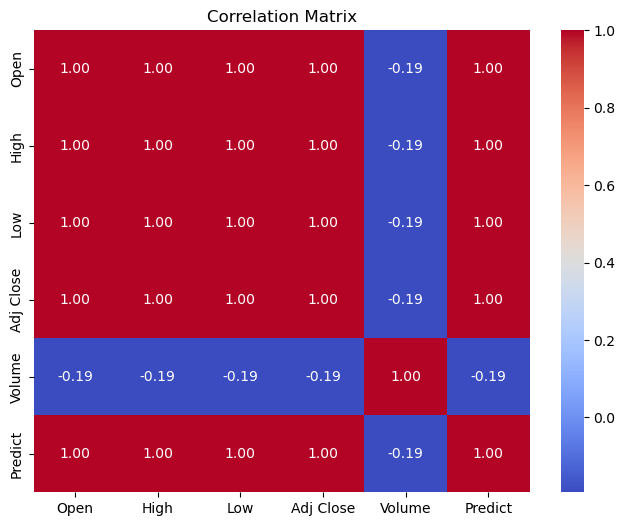

In [9]:
# Create a correlation matrix
correlation_matrix = dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Predict']].corr()

# Building a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Data Normalization 

Having analyzed the graphs and correlation heatmap, we observe that **"Predict"** is strongly correlated with features such as "Open", "High", "Low" and "Adj Close", while "Volume" exhibits a weaker correlation of approximately **-0.19**. Despite this, we choose to include "Volume" in our **input features (X)** for diversity, recognizing that its incorporation may contribute to the overall predictive capability of the model.

For the normalization of the input features (X), we employed the [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) module from the [scikit-learn](https://scikit-learn.org/) library. This module is instrumental in transforming the feature values to a uniform scale, typically between **0** and **1**. Specifically, we applied it to features extracted from columns 1 to 6 in the dataset. This process ensures that all features contribute uniformly to the model, preventing any particular feature from dominating due to a disparate scale.

Conversely, when dealing with the **target variable (y)**, represented by the "Predict" column, we refrained from normalization. This is in accordance with the observation that normalization of the target variable is often *unnecessary for linear regression tasks*, as it doesn't influence the model's performance. The `MinMaxScaler` module facilitates this normalization process by scaling the input values, enhancing the overall robustness and convergence of machine learning models.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Extracting features (X) from columns 1 to 6 in the dataset
X = dataset.iloc[:, 1:6].values

# Using Min-Max scaling to normalize the feature values between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Extracting the target variable (y) from the last column in the dataset
y = dataset.iloc[:, -1].values

### Data Splitting

Following the distribution of features into input (X) and output (y), we proceed to divide the dataset into a training set and a test set. This partitioning is executed through the use of the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from the `scikit-learn` library, allocating **80%** of the data to the training set and **20%** to the test set. The inclusion of a random seed `(random_state=42)` ensures the replicability of the split across different executions.

Subsequently, to adapt to [PyTorch's tensor](https://pytorch.org/docs/stable/tensors.html) requirements and leverage the benefits of utilizing graphical processing units (GPUs), we convert the data into PyTorch tensors using the `torch` library. The input features are delineated as **X_train** and **X_test**, while the target variable is represented by **y_train** and **y_test**. This tensor conversion is carried out with a data type specification of `torch.float32`. Utilizing tensors enhances the computational efficiency of neural network operations by harnessing the parallel processing capabilities of GPUs. This optimization is crucial for accelerating model training and evaluation processes.

In [11]:
from sklearn.model_selection import train_test_split
import torch

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting the data into PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Network Design 🎨

In this section, we embark on the creation of neural networks designed for predicting stock prices one day ahead. Our objective is to develop a diverse set of 5 networks, encompassing both simple and complex architectures, to assess their performance and efficiency.

For defining the network, we will utilize the `PyTorch` library, a powerful tool for constructing and training neural networks. The key components in creating a neural network include:

1. **Model**: A neural network model serves as the architectural blueprint for predicting stock prices. I explored diverse topologies, encompassing both feedforward sequential models and recurrent models (RNN, LSTM, GRU). The feedforward models consisted of a simple architecture and a more complex one with additional hidden layers to enhance performance. For simplicity and ease of implementation, I utilized the [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) model in PyTorch, facilitating a structured and intuitive design. 

2. **Layers**: In our neural network architecture, layers are crucial components that enable effective learning. The initial layer acts as the input layer with *5 nodes* representing input features. As we progress, [hidden layers](https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning) capture intricate patterns within the data, utilizing [linear activation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) for flexible operations and [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) activation for introducing non-linearity. The output layer, featuring a *single node*, is designed for regression tasks, generating predictions. This layered structure empowers the network to process data, discover patterns, and make accurate predictions.

3. **Optimizer**: The optimizer plays a vital role in training neural networks by influencing parameter updates during convergence. We selected the [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) optimizer for its adaptability to large datasets. Adam dynamically adjusts the [learning rate](https://deepchecks.com/glossary/learning-rate-in-machine-learning/#:~:text=The%20learning%20rate%2C%20denoted%20by,network%20concerning%20the%20loss%20gradient%3E.), a crucial parameter that dictates the size of optimization steps. This adaptability proves advantageous for extensive datasets, ensuring stability and efficiency in the convergence process. The learning rate represents the step size during optimization, and its thoughtful selection is paramount for successful convergence.

4. **Loss Function (Loss)**: The loss function, or [Mean Squared Error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) (MSE) in our case, quantifies the disparity between predicted and actual values during training. MSE is a common choice for regression tasks, providing a measure of the model's performance. It works by calculating the average squared difference between predicted and true values. Minimizing this loss during training aligns the model with the desired outcome, ensuring accurate predictions. MSE's simplicity and effectiveness make it suitable for our stock price prediction task.

In [21]:
# Creating a simple neural network model
model_simple = torch.nn.Sequential(
    torch.nn.Linear(5, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 1),
)

# Initializing the Adam optimizer with a learning rate of 0.01
optimizer_simple = torch.optim.Adam(model_simple.parameters(), lr=0.01)

# Defining the Mean Squared Error (MSE) loss criterion
criterion_simple = torch.nn.MSELoss()

In [13]:
# Creating a complex neural network model
model_complex = torch.nn.Sequential(
    torch.nn.Linear(5, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1)
)

# Initializing the Adam optimizer with a learning rate of 0.02
optimizer_complex = torch.optim.Adam(model_complex.parameters(), lr=0.02)

# Defining the Mean Squared Error (MSE) loss criterion
criterion_complex = torch.nn.MSELoss()

## Features of Recurrent Networks

Recurrent neural networks (RNNs), long short-term memory networks (LSTMs), and gated recurrent units (GRUs) play a pivotal role in capturing temporal dependencies within sequential data, making them particularly suitable for time series prediction tasks such as stock price forecasting.

#### Architecture Definition

In our implementation, we utilized the PyTorch modules `torch.nn.RNN`, `torch.nn.LSTM`, and `torch.nn.GRU` to instantiate recurrent layers. The key parameters include:

- `Input Size`: This parameter represents the dimensionality of the input data. In our context, it signifies the number of features present in the input sequence.
  
- `Hidden Size`: This parameter determines the number of hidden units or neurons within each recurrent layer. It plays a crucial role in shaping the network's ability to capture intricate patterns in the data.

- `Batch First`: This boolean parameter influences the data format during training. Setting it to `True` indicates that the input data follows the (batch, sequence, feature) format.

- `Number of Layers`: Denoting how many recurrent layers are stacked on top of each other, this parameter is essential for capturing complex patterns in sequential data.

- `Dropout`: Dropout is a regularization technique that helps prevent overfitting by randomly disabling a fraction of connections during training. The dropout parameter represents the probability of dropping connections, and its tuning is crucial for model generalization.

#### Activation Function Consideration

It is noteworthy that traditional activation functions like Rectified Linear Unit (ReLU) are not suitable for recurrent layers due to vanishing gradient problems. Instead, the default activation functions embedded within PyTorch's recurrent layers are adept at handling the sequential nature of the data.

#### Custom Module for Tensor Extraction

To address specific requirements in our architecture, we implemented a custom PyTorch module, `ExtractTensor`, designed to extract tensors from input tuples. This module ensures compatibility with the data structure used during the training process, enhancing the seamless integration of recurrent layers into our neural network architecture.

In [14]:
# Custom PyTorch Module for Extracting Tensor from Tuple
class ExtractTensor(torch.nn.Module):
    def forward(self,x):
        # Extracting the tensor from the input tuple
        tensor, _ = x
        # Returning the extracted tensor 
        return tensor[:, :]

In [15]:
# Creating a Recurrent Neural Network (RNN) model
model_rnn = torch.nn.Sequential(
    torch.nn.RNN(input_size=5, hidden_size=64, batch_first=True, num_layers=3, dropout=0.5), 
    ExtractTensor(),
    torch.nn.Linear(64, 32),
    torch.nn.Linear(32, 1)
)

# Initializing the Adam optimizer with a learning rate of 0.01
optimizer_rnn = torch.optim.Adam(model_rnn.parameters(), lr=0.01)

# Defining the Mean Squared Error (MSE) loss criterion
criterion_rnn = torch.nn.MSELoss()

In [16]:
# Creating a Long Short-Term Memory network (LSTM) model
model_lstm = torch.nn.Sequential(
    torch.nn.LSTM(input_size=5, hidden_size=64, batch_first=True, num_layers=2, dropout=0.3), 
    ExtractTensor(),
    torch.nn.Linear(64, 32),
    torch.nn.Linear(32, 1)
)

# Initializing the Adam optimizer with a learning rate of 0.02
optimizer_lstm = torch.optim.Adam(model_lstm.parameters(), lr=0.02)

# Defining the Mean Squared Error (MSE) loss criterion
criterion_lstm = torch.nn.MSELoss()

In [17]:
# Creating a Gated Recurrent Unit network (GRU) model
model_gru = torch.nn.Sequential(
    torch.nn.GRU(input_size=5, hidden_size=32, batch_first=True, num_layers=2, dropout=0.2), 
    ExtractTensor(),
    torch.nn.Linear(32, 16),
    torch.nn.Linear(16, 1) 
)

# Initializing the Adam optimizer with a learning rate of 0.02
optimizer_gru = torch.optim.Adam(model_gru.parameters(), lr=0.02)

# Defining the Mean Squared Error (MSE) loss criterion
criterion_gru = torch.nn.MSELoss()

# Network Training 🚀

Once the neural network architectures have been defined, the next step is to train these networks using the training data. This section delves into the key components of the training process.

### Epochs

In the context of neural network training, an epoch refers to a complete pass through the entire training dataset. During each epoch, the model learns from the entire dataset, making multiple iterations if necessary. The selected `100` epochs represent an initial choice for training, providing a balance between computational efficiency and model convergence; this value can be adjusted to optimize performance based on dataset characteristics.

## Model Training Logic

Training a neural network involves a sequence of steps, including `forward` and `backward` passes, `optimization`, and `parameter updates`. To prepare the model for training, the `model.train()` method is employed. This sets the model in training mode, ensuring that layers such as dropout behave correctly during the training process. 

### Forward Pass

The forward pass involves passing the input data through the neural network to generate predictions. This is implemented using `model(X_train)`. 

### Loss Function

The loss function calculates the difference between the predicted output and the actual target values. It serves as a measure of how well the model is performing. In our case, we use Mean Squared Error (MSE) as the loss function: `criterion(preds.view(-1), y_train.view(-1))`. The `view(-1)` operation flattens both predicted outputs (`preds`) and target values (`y_train`) into one-dimensional arrays, ensuring compatibility for Mean Squared Error (MSE) loss calculation and simplifying the comparison by aligning them into a consistent shape, thus facilitating squared differences computation.

### Backward Pass

The backward pass calculates the gradients of the model parameters with respect to the loss. This step is crucial for updating the model during optimization. To initiate the backward pass and compute gradients, we use `loss.backward()`. Prior to initiating the backward pass, it's crucial to zero out the gradients using `optimizer.zero_grad()` to ensure accurate gradient computation in each training iteration.

### Optimization

The Adam optimizer, applied through `optimizer.step()`, adjusts the model's parameters based on these gradients, refining its predictive capabilities.

## Code Implementation

The provided code exemplifies the training process for a list of models. It involves setting the model to training mode, zeroing the gradients, performing a forward pass, calculating the loss, executing the backward pass, and updating the model's parameters. The training progress, including the model name and loss, is printed every 10 epochs.

In [18]:
# List of models to train 
models = [model_simple, model_complex, model_rnn, model_lstm, model_gru]

# Names corresponding to each model for identification
models_name = ["Simple model", "Complex model", "RNN model", "LSTM model", "GRU model"]

# Optimizers for each model
optimizers = [optimizer_simple, optimizer_complex, optimizer_rnn, optimizer_lstm, optimizer_gru]

# Loss functions for each model
criterions = [criterion_simple, criterion_complex, criterion_rnn, criterion_lstm, criterion_gru]

# Number of training epochs
epochs = 100

# Loop over each model
for model, model_name, optimizer, criterion in zip(models, models_name, 
                                                   optimizers, criterions):
    # Loop for training epochs
    for epoch in range(epochs):
        
        # Set the model to training mode
        model.train() 
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass to get predictions
        preds = model(X_train)
        
        # Calculate the loss
        loss = criterion(preds.view(-1), y_train.view(-1))
        
        # Backward pass to compute gradients
        loss.backward()
        
        # Update the model's parameters
        optimizer.step()
        
        # Printing loss every 10 epochs for each model
        if (epoch + 1) % 10 == 0:
            print(f"Model: {model_name}, Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}")
    print("-" * 60)

Model: Simple model, Epoch [10/100], Loss: 1030.9968
Model: Simple model, Epoch [20/100], Loss: 943.7975
Model: Simple model, Epoch [30/100], Loss: 804.6168
Model: Simple model, Epoch [40/100], Loss: 632.3116
Model: Simple model, Epoch [50/100], Loss: 472.2766
Model: Simple model, Epoch [60/100], Loss: 340.4543
Model: Simple model, Epoch [70/100], Loss: 212.8518
Model: Simple model, Epoch [80/100], Loss: 103.8087
Model: Simple model, Epoch [90/100], Loss: 34.1098
Model: Simple model, Epoch [100/100], Loss: 5.9491
------------------------------------------------------------
Model: Complex model, Epoch [10/100], Loss: 1003.6730
Model: Complex model, Epoch [20/100], Loss: 712.8530
Model: Complex model, Epoch [30/100], Loss: 400.7018
Model: Complex model, Epoch [40/100], Loss: 163.6949
Model: Complex model, Epoch [50/100], Loss: 29.1785
Model: Complex model, Epoch [60/100], Loss: 2.3583
Model: Complex model, Epoch [70/100], Loss: 2.0655
Model: Complex model, Epoch [80/100], Loss: 2.4282
Mo

# Network Evaluation 📉

After training the neural network models, it's essential to assess their performance on unseen data.

In the evaluation phase, we deploy the `torch.no_grad()` context manager to disable gradient computation, ensuring efficient model evaluation without unnecessary computations. The `model.eval()` method is employed to set the model to evaluation mode, enabling proper functioning of layers like dropout during inference.

Metric computation involves using the scikit-learn library's `r2_score` for calculating the R-squared metric and PyTorch's criterion function for Mean Squared Error (MSE) loss. These metrics collectively provide a comprehensive understanding of the models' predictive performance.

The evaluation process extends to visualizing results using Matplotlib, a powerful plotting library. The scatter plots generated showcase a direct comparison between the actual stock prices and the corresponding predictions made by the models. These visualizations provide valuable insights, allowing for a clear understanding of the models' accuracy and highlighting any patterns or discrepancies in their predictions.

To systematically analyze and communicate the evaluation results, we have stored key metrics such as Test Loss and R-squared scores for each model. 

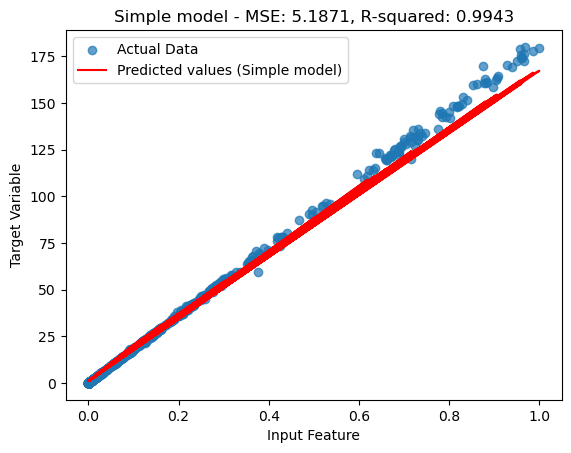

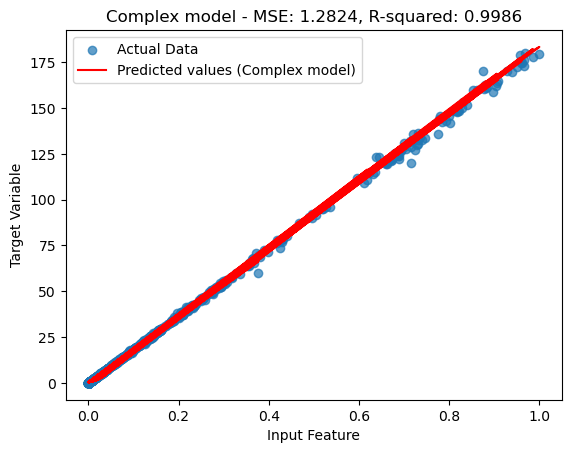

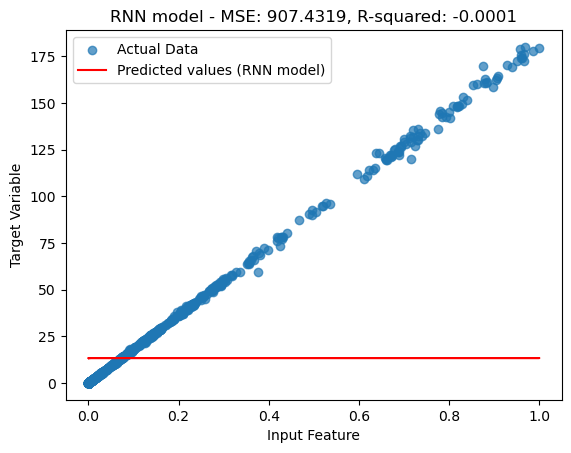

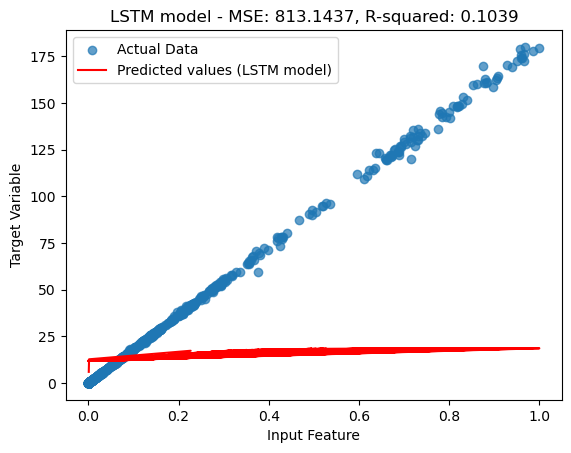

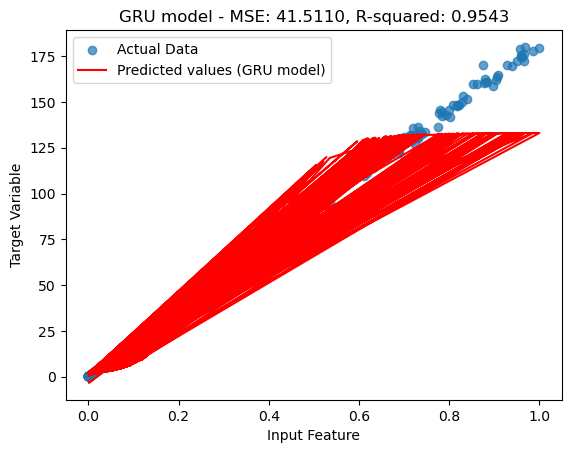

Model: Simple model, Test Loss: 5.1871, R-squared: 0.9943
Model: Complex model, Test Loss: 1.2824, R-squared: 0.9986
Model: RNN model, Test Loss: 907.4319, R-squared: -0.0001
Model: LSTM model, Test Loss: 813.1437, R-squared: 0.1039
Model: GRU model, Test Loss: 41.5110, R-squared: 0.9543


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# List to store the results
results = []

# Iterate over each model
for model, model_name in zip(models, models_name):
    # Make predictions on the test data
    with torch.no_grad():
        model.eval()           # Set the model to evaluation mode
        preds = model(X_test)  # Forward pass to get predictions

    # Calculate the coefficient of determination (R-squared)
    r2 = r2_score(y_test, preds.numpy())

    # Evaluate performance using the loss function
    test_loss = criterion(preds.view(-1), y_test.view(-1))

    # Visualize the results
    plt.scatter(X_test[:, 4].numpy(), y_test.numpy(), label="Actual Data", alpha=0.7)
    plt.plot(X_test[:, 4].numpy(), preds, label=f"Predicted values ({model_name})", color='red')
    plt.xlabel("Input Feature")
    plt.ylabel("Target Variable")
    plt.title(f"{model_name} - MSE: {test_loss.item():.4f}, R-squared: {r2:.4f}")
    plt.legend()
    plt.show()

    # Save the results
    results.append({"model_name": model_name, "test_loss": test_loss.item(), "r2_score": r2})

# Display the results
for result in results:
    print(f"Model: {result['model_name']}, Test Loss: {result['test_loss']:.4f}, R-squared: {result['r2_score']:.4f}")

# Conclusion 📓

This project proved to be a labor-intensive endeavor, spanning two weeks with intermittent breaks due to various challenges, especially in crafting the neural network architecture. Initially aimed at predicting returns, I shifted to forecasting stock prices 30 days ahead, abandoning the idea due to the dataset's limitations. Eventually, I settled on predicting the next day's stock price, as advised by my mentor to enhance task complexity. 

The Data Processing phase, including visualization, correlation analysis, and dataset normalization, posed no major challenges, benefiting from my prior experience with linear regression.

The main challenge arose in constructing the network. Incorrect architecture forced me to revise previous steps repeatedly. After a long break, I reassessed and successfully completed the task. Choosing five network topologies, including simple and complex forward sequential models, along with recurrent models (RNN, LSTM, and GRU), aimed to predict stock prices more effectively than linear regression.

During training, recurrent networks presented issues, requiring a custom class, ExtractTensor, to address tensor size inconsistencies. Despite fixing this, RNN exhibited slow training and consistent high loss, prompting extensive hyperparameter adjustments. Ultimately, RNN and LSTM failed to meet expectations, while GRU demonstrated commendable performance.

In the evaluation phase, we assessed all networks in the Network Evaluation section. Blue dots represent actual data, and the red line represents the network's predictions. Results showed the simple model achieving **99.43%**, the complex model at **99.86%**, and the recurrent network at **95%**. RNN and LSTM performed below **1%**. Despite initial expectations for better results from recurrent networks due to their temporal nature, their limitations in handling stock price forecasting were evident.

In conclusion, this project enhanced my understanding of neural networks, their challenges, and the importance of suitable architectures for specific tasks. The final results indicated that neural networks outperformed simple linear regression, providing a valuable insight into their superiority in stock price prediction.

# Author 🧑🏻

My name is Dmytro Varich, and I am a student at [TUKE](https://www.tuke.sk/wps/portal) University, majoring in Intelligent Systems. This article is intended for the completion of Assignment 2 in the subject of Artificial Intelligence. Similar content is also shared on my [Telegram](https://t.me/varich_channel) channel.

Email: [dmytro.varich@student.tuke.sk](mailto:dmytro.varich@student.tuke.sk)

This documentation was also written with the intention of delving deeper into the field of Machine Learning.